In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('TCS.csv')

In [3]:
print("--- Dataset Shape Before Preprocessing ---")
print(df.shape)
df.info()
print("\n--- Missing Values Before Preprocessing ---")
print(df.isnull().sum())

--- Dataset Shape Before Preprocessing ---
(4139, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4139 non-null   object 
 1   Symbol              4139 non-null   object 
 2   Series              4139 non-null   object 
 3   Prev Close          4139 non-null   float64
 4   Open                4139 non-null   float64
 5   High                4139 non-null   float64
 6   Low                 4139 non-null   float64
 7   Last                4139 non-null   float64
 8   Close               4139 non-null   float64
 9   VWAP                4139 non-null   float64
 10  Volume              4139 non-null   int64  
 11  Turnover            4139 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4139 non-null   int64  
 14  %Deliverble         4139 non-null   float64
dtypes

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
df_processed = df[['Close']].copy()

In [6]:
print("\n\n--- Dataset Shape After Selecting 'Close' Column ---")
print(df_processed.shape)
print(df_processed.head())



--- Dataset Shape After Selecting 'Close' Column ---
(4139, 1)
             Close
Date              
2004-08-25  987.95
2004-08-26  979.00
2004-08-27  962.65
2004-08-30  986.75
2004-08-31  988.10


In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_processed['Scaled_Close'] = scaler.fit_transform(df_processed[['Close']])
df_processed.head()

,Close,Scaled_Close
Date,,
2004-08-25,987.95,0.191934
2004-08-26,979.00,0.189169
2004-08-27,962.65,0.184118
2004-08-30,986.75,0.191563
2004-08-31,988.10,0.191980


In [8]:
print("\n--- After Preprocessing ---")
print("Shape:", df_processed.shape)
print("First 5 Rows:\n", df_processed.head())


--- After Preprocessing ---
Shape: (4139, 2)
First 5 Rows:
              Close  Scaled_Close
Date                            
2004-08-25  987.95      0.191934
2004-08-26  979.00      0.189169
2004-08-27  962.65      0.184118
2004-08-30  986.75      0.191563
2004-08-31  988.10      0.191980


In [9]:
df_processed.to_csv('TCS_preprocessed.csv')
print("\nPreprocessed data saved to TCS_preprocessed.csv")


Preprocessed data saved to TCS_preprocessed.csv


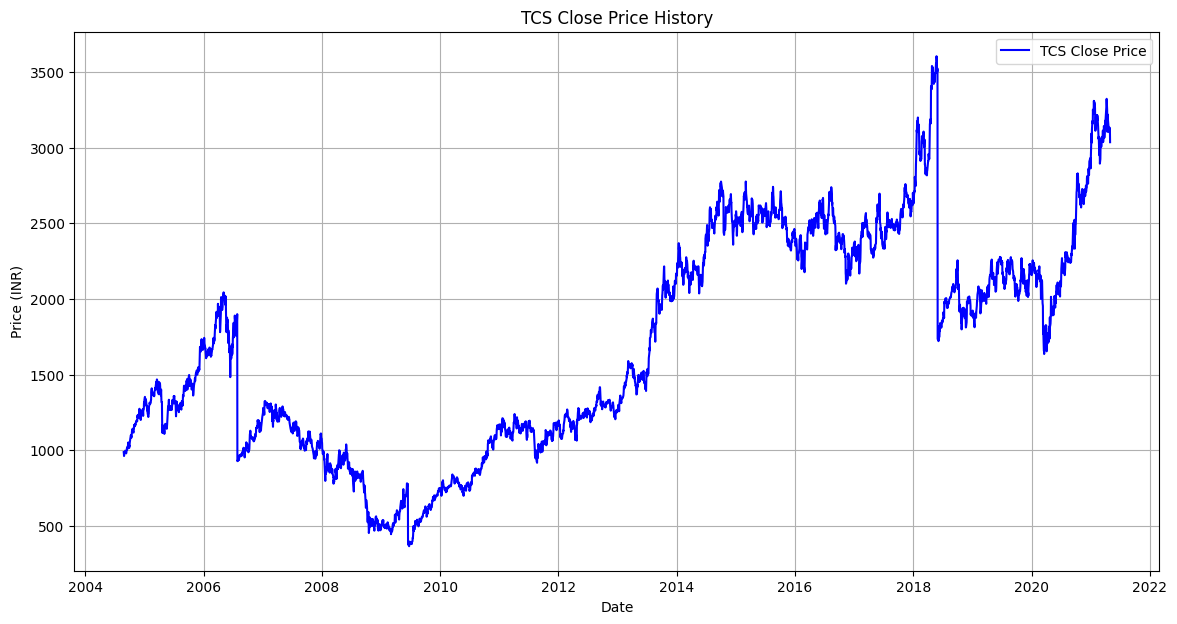

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(df_processed.index, df_processed['Close'], label='TCS Close Price', color='blue')
plt.title('TCS Close Price History')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

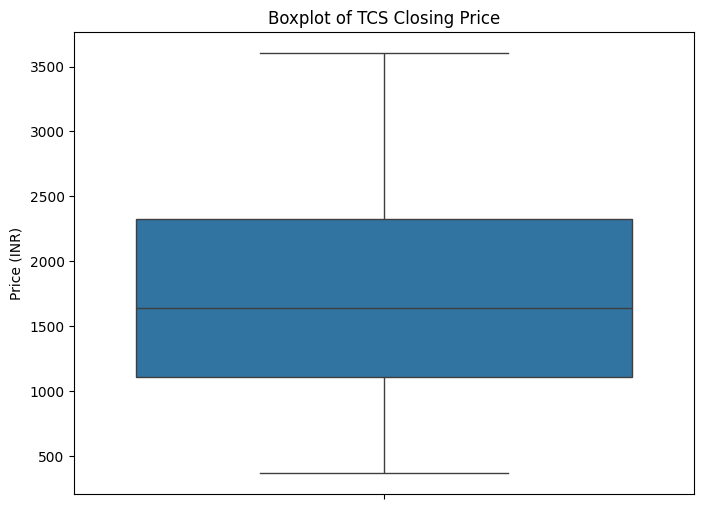

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_processed['Close'])
plt.title('Boxplot of TCS Closing Price')
plt.ylabel('Price (INR)')
plt.show()

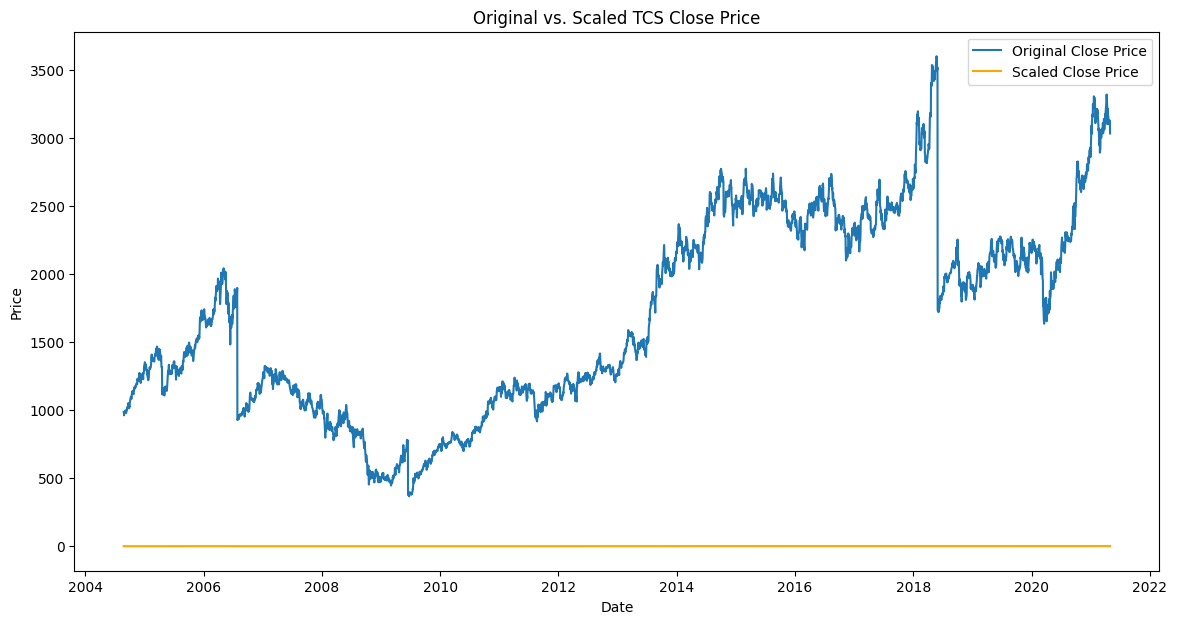

In [12]:
plt.figure(figsize=(14, 7))
plt.plot(df_processed.index, df_processed['Close'], label='Original Close Price')
plt.plot(df_processed.index, df_processed['Scaled_Close'], label='Scaled Close Price', color='orange')
plt.legend()
plt.title('Original vs. Scaled TCS Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

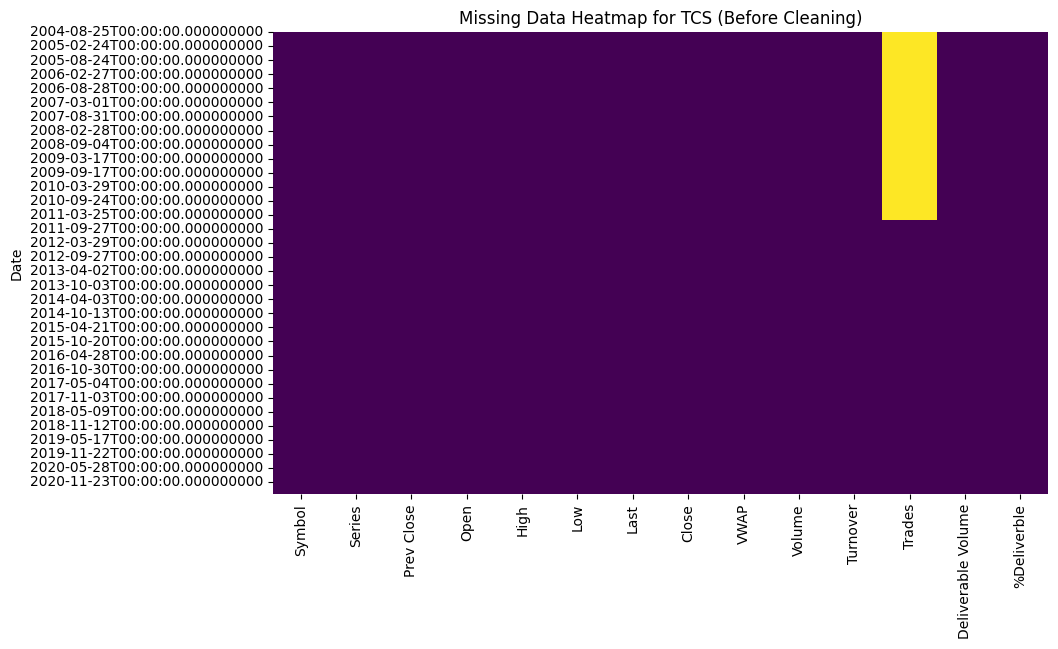

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap for TCS (Before Cleaning)')
plt.show()